# EDA and Scikit-learn models

## Contents

[EDA and pre-processing](#eda-and-pre-processing)
* Loaded the data and visualized the distribution of the target variable (LogD)
* Trained test split data based on scaffold and visualize target variable
* Generated descriptors and visualised chemical space 

[Trained Scikit-learn models](#)
* Four different models and evaluated performance on test set

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
from logd_pka_calculator.utils.project_setup import set_up
from logd_pka_calculator.visualization.visualize import (
    plot_distribution, 
    compare_train_test_distribution, 
    pca_then_tsne,
    )
from logd_pka_calculator.data.make_dataset import load_logd_data, train_test_split
from logd_pka_calculator.features.build_features import all_descriptors
from logd_pka_calculator.models.sklearn import regression_models
from config import DATA_PATH

# Set up data folder
set_up()

# Set random seed for reproducability
np.random.seed(2023)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EDA and pre-processing

In [8]:
logd_data = load_logd_data(DATA_PATH)
logd_data.head(2)

,ROMol,SMILES,Murcko_SMILES,logd_x,apka_x,bpka_x
ID,,,,,,
7057,<rdkit.Chem.rdchem.Mol object at 0x17ad13a00>,CN(C)CC(NC(=O)c1cc(-c2ccccc2)nc2ccccc12)c1ccccc1,O=C(NCc1ccccc1)c1cc(-c2ccccc2)nc2ccccc12,4.25,NaN,8.1099997
13267,<rdkit.Chem.rdchem.Mol object at 0x17ad13920>,CC(Oc1ccccc1)C1=NCCN1,c1ccc(OCC2=NCCN2)cc1,-0.31,NaN,9.2700005


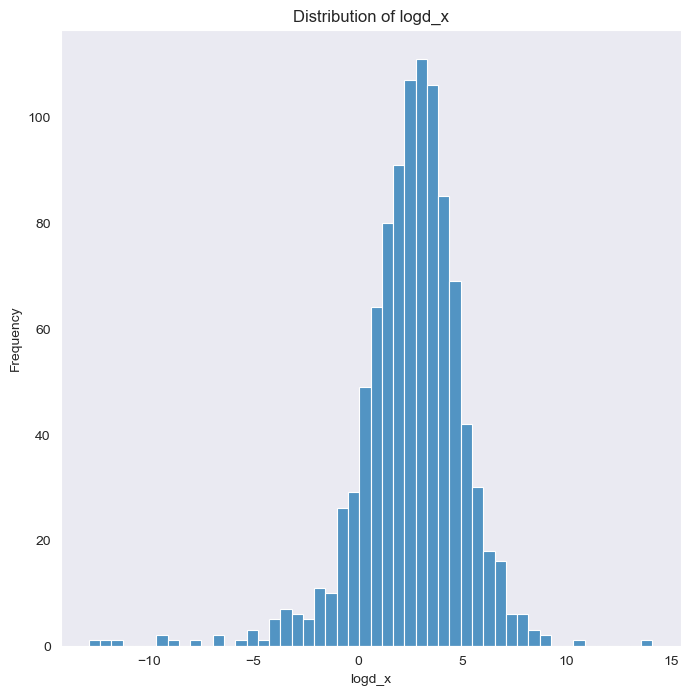

In [9]:
plot_distribution(logd_data, "logd_x")

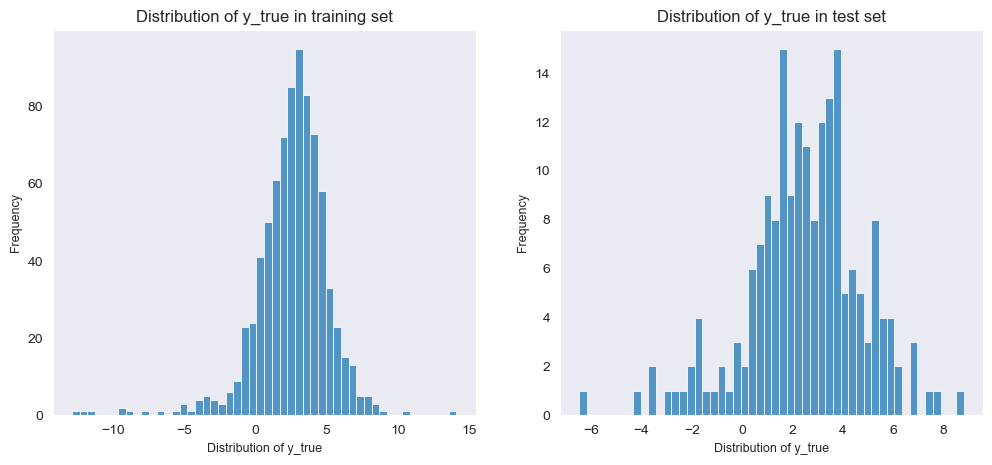

In [10]:
train, test = train_test_split(logd_data)
train.to_csv("../data/processed/train_data.csv")
test.to_csv("../data/processed/test_data.csv")
compare_train_test_distribution(train, test, "logd_x")

/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
[15:51:35] Can't kekulize mol.  Unkekulized atoms: 3 5
[15:51:35] Can't kekulize mol.  Unkekulized atoms: 3 5


Variance in top 50 principle components: 0.843


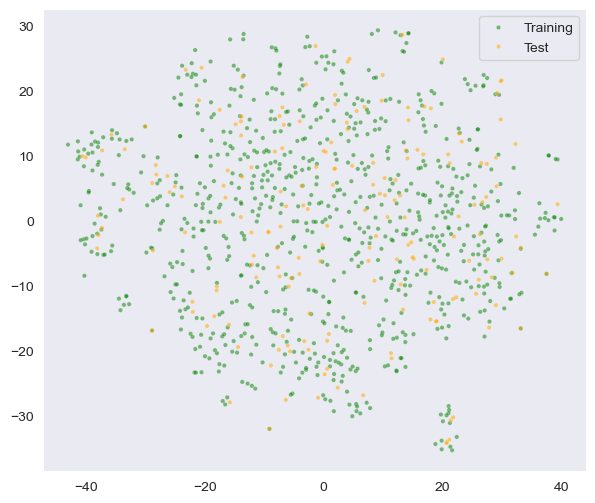

In [11]:
training_desc = all_descriptors(train)
training_desc.to_csv("../data/processed/train_desc.csv")
test_desc = all_descriptors(test)
test_desc.to_csv("../data/processed/test_desc.csv")

pca_then_tsne(
    features=[training_desc.iloc[:, -214:], test_desc.iloc[:, -214:]],
    classes=["Training", "Test"],
)

## Training models

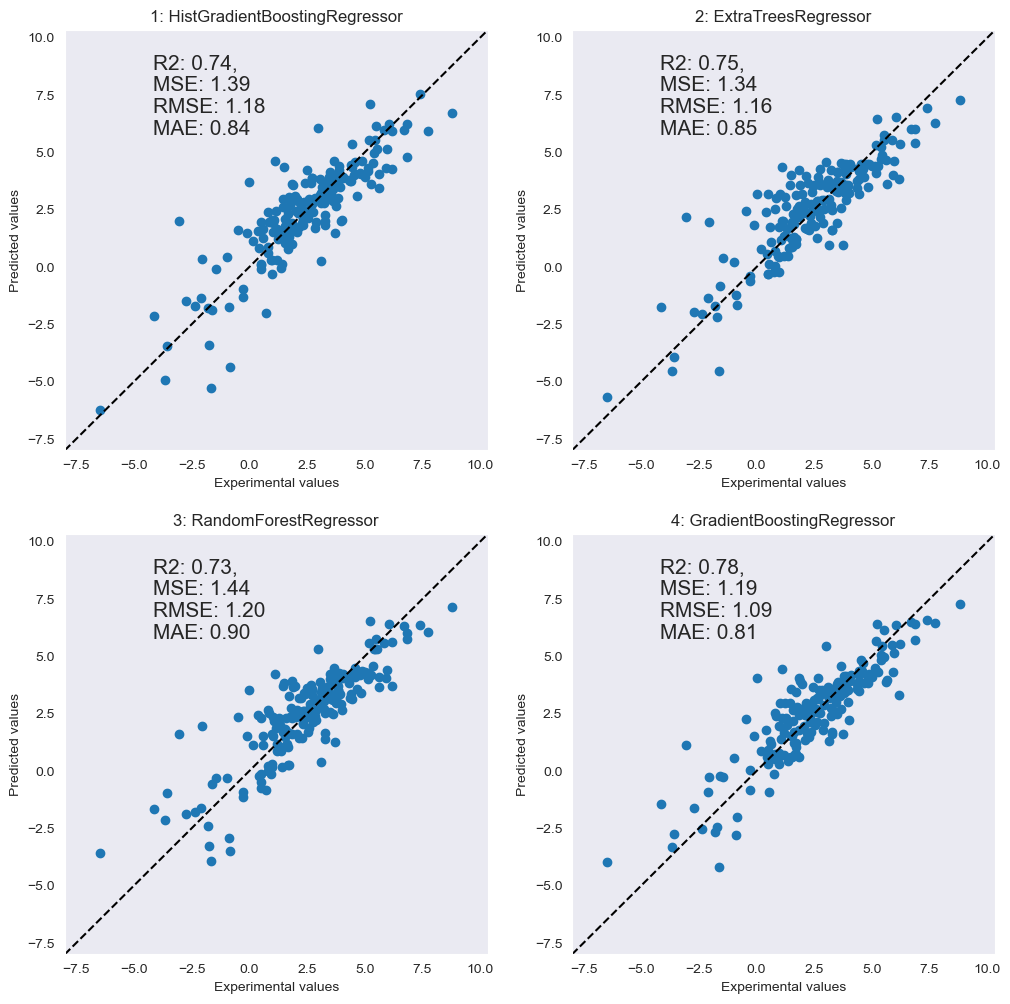

In [12]:
X_train = np.array(training_desc)
y_train = np.array(train.logd_x)
X_test = np.array(test_desc)
y_test = np.array(test.logd_x)

regression_models(X_train, y_train, X_test, y_test)